In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("AirQualityUCI_complete_data.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
df = df.drop(["Date","Time"],axis=1)
df.head()

# Replace -200 (i.e. missing values) to mean value
df[:] = df[:].replace(-200,np.nan)
df.fillna(df.mean(), inplace=True)

In [3]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

df_normalize = normalize(df)
df_normalize.head(15)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215
5,0.093220,0.394794,0.026227,0.072209,0.200464,0.058903,0.429736,0.278354,0.378597,0.316390,0.281183,0.628536,0.293249
6,0.093220,0.386176,0.020305,0.054650,0.167281,0.040623,0.482791,0.222091,0.351506,0.222222,0.284409,0.598366,0.281296
7,0.076271,0.351167,0.020305,0.049969,0.157722,0.040623,0.479191,0.219129,0.351506,0.220919,0.270430,0.638906,0.286147
8,0.067797,0.320826,0.014382,0.034444,0.123037,0.029113,0.532458,0.171750,0.325989,0.173129,0.269892,0.634821,0.283499
9,0.042373,0.260323,0.010152,0.024336,0.096955,0.165796,0.585831,0.328918,0.307442,0.121755,0.261290,0.641420,0.277067


In [4]:
# Check for null values

# print(df_normalize.isnull().sum())
# print(df_normalize[:].max())

In [5]:
# Split x_train and x_test
x_train = df_normalize

In [6]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
import keras
keras.backend.set_epsilon(0.01) # For mape error

input_size = 13
hidden_size_1 = 12
hidden_size_2 = 12
code_size = 12
activation = 'tanh'

input_layer = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation=activation)(input_layer)
hidden_12 = Dense(hidden_size_2, activation=activation)(hidden_1)
code = Dense(code_size)(hidden_12)
hidden_22 = Dense(hidden_size_2, activation=activation)(code)
hidden_2 = Dense(hidden_size_1, activation=activation)(hidden_22)
output_layer = Dense(input_size)(hidden_2)

# input_layer = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size_1, activation='tanh')(input_layer)
# code = Dense(code_size)(hidden_1)
# hidden_2 = Dense(hidden_size_1, activation='tanh')(code)
# output_layer = Dense(input_size)(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(lr=0.001, epsilon=1e-08), loss='mse', metrics=['mape'])
history = autoencoder.fit(x_train, x_train, epochs=1000, validation_split=0.2, batch_size=32)

Using TensorFlow backend.
W0229 10:09:58.971286 15180 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0229 10:09:59.017106 15180 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0229 10:09:59.031345 15180 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0229 10:09:59.269161 15180 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0229 10:09:59.617168 15180 deprecation_wrapper.py:119

Train on 7485 samples, validate on 1872 samples
Epoch 1/1000
7485/7485 [==============================] - 3s 350us/step - loss: 0.0296 - mean_absolute_percentage_error: 62.5732 - val_loss: 0.0165 - val_mean_absolute_percentage_error: 67.5915
Epoch 2/1000
7485/7485 [==============================] - 1s 98us/step - loss: 0.0077 - mean_absolute_percentage_error: 34.6410 - val_loss: 0.0064 - val_mean_absolute_percentage_error: 34.1631
Epoch 3/1000
7485/7485 [==============================] - 1s 90us/step - loss: 0.0039 - mean_absolute_percentage_error: 24.4857 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 32.4763
Epoch 4/1000
7485/7485 [==============================] - 1s 93us/step - loss: 0.0028 - mean_absolute_percentage_error: 21.4866 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 31.6632
Epoch 5/1000
7485/7485 [==============================] - 1s 88us/step - loss: 0.0024 - mean_absolute_percentage_error: 20.0718 - val_loss: 0.0036 - val_mean_absolute_percentage_e

7485/7485 [==============================] - 0s 63us/step - loss: 4.8027e-04 - mean_absolute_percentage_error: 9.3468 - val_loss: 8.2870e-04 - val_mean_absolute_percentage_error: 17.3030
Epoch 43/1000
7485/7485 [==============================] - 1s 110us/step - loss: 4.7854e-04 - mean_absolute_percentage_error: 9.3332 - val_loss: 8.0542e-04 - val_mean_absolute_percentage_error: 16.3078
Epoch 44/1000
7485/7485 [==============================] - 1s 103us/step - loss: 4.7778e-04 - mean_absolute_percentage_error: 9.3424 - val_loss: 8.2134e-04 - val_mean_absolute_percentage_error: 17.2625
Epoch 45/1000
7485/7485 [==============================] - 1s 90us/step - loss: 4.7821e-04 - mean_absolute_percentage_error: 9.3648 - val_loss: 8.1317e-04 - val_mean_absolute_percentage_error: 17.0545
Epoch 46/1000
7485/7485 [==============================] - 1s 89us/step - loss: 4.7541e-04 - mean_absolute_percentage_error: 9.3143 - val_loss: 8.3581e-04 - val_mean_absolute_percentage_error: 17.2617
Epoch 4

Epoch 83/1000
7485/7485 [==============================] - 1s 98us/step - loss: 4.3922e-04 - mean_absolute_percentage_error: 9.0193 - val_loss: 6.5777e-04 - val_mean_absolute_percentage_error: 14.7722
Epoch 84/1000
7485/7485 [==============================] - 1s 90us/step - loss: 4.3866e-04 - mean_absolute_percentage_error: 9.0420 - val_loss: 6.3542e-04 - val_mean_absolute_percentage_error: 13.7349
Epoch 85/1000
7485/7485 [==============================] - 1s 93us/step - loss: 4.3705e-04 - mean_absolute_percentage_error: 9.0074 - val_loss: 6.1071e-04 - val_mean_absolute_percentage_error: 14.7844
Epoch 86/1000
7485/7485 [==============================] - 1s 162us/step - loss: 4.3443e-04 - mean_absolute_percentage_error: 8.9906 - val_loss: 5.8003e-04 - val_mean_absolute_percentage_error: 14.1503
Epoch 87/1000
7485/7485 [==============================] - 1s 141us/step - loss: 4.3297e-04 - mean_absolute_percentage_error: 8.9957 - val_loss: 6.0395e-04 - val_mean_absolute_percentage_error: 1

7485/7485 [==============================] - 1s 86us/step - loss: 3.6106e-04 - mean_absolute_percentage_error: 8.1931 - val_loss: 7.4010e-04 - val_mean_absolute_percentage_error: 14.7562
Epoch 124/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.5942e-04 - mean_absolute_percentage_error: 8.1438 - val_loss: 6.8749e-04 - val_mean_absolute_percentage_error: 14.3580
Epoch 125/1000
7485/7485 [==============================] - 1s 86us/step - loss: 3.5696e-04 - mean_absolute_percentage_error: 8.1011 - val_loss: 6.1767e-04 - val_mean_absolute_percentage_error: 13.9943
Epoch 126/1000
7485/7485 [==============================] - 1s 91us/step - loss: 3.5543e-04 - mean_absolute_percentage_error: 8.0914 - val_loss: 6.2245e-04 - val_mean_absolute_percentage_error: 14.3679
Epoch 127/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.5651e-04 - mean_absolute_percentage_error: 8.0794 - val_loss: 7.0563e-04 - val_mean_absolute_percentage_error: 14.4724
Epoch

Epoch 164/1000
7485/7485 [==============================] - 1s 82us/step - loss: 3.2498e-04 - mean_absolute_percentage_error: 7.5317 - val_loss: 7.0622e-04 - val_mean_absolute_percentage_error: 15.0084
Epoch 165/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.2560e-04 - mean_absolute_percentage_error: 7.5279 - val_loss: 7.0121e-04 - val_mean_absolute_percentage_error: 15.2157
Epoch 166/1000
7485/7485 [==============================] - 1s 83us/step - loss: 3.2375e-04 - mean_absolute_percentage_error: 7.5303 - val_loss: 7.4967e-04 - val_mean_absolute_percentage_error: 15.7177
Epoch 167/1000
7485/7485 [==============================] - 1s 83us/step - loss: 3.2336e-04 - mean_absolute_percentage_error: 7.5189 - val_loss: 7.2499e-04 - val_mean_absolute_percentage_error: 15.0330
Epoch 168/1000
7485/7485 [==============================] - 1s 82us/step - loss: 3.2344e-04 - mean_absolute_percentage_error: 7.5154 - val_loss: 6.9362e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 85us/step - loss: 3.1599e-04 - mean_absolute_percentage_error: 7.4579 - val_loss: 6.7923e-04 - val_mean_absolute_percentage_error: 14.5846
Epoch 205/1000
7485/7485 [==============================] - 1s 85us/step - loss: 3.1617e-04 - mean_absolute_percentage_error: 7.4669 - val_loss: 7.3946e-04 - val_mean_absolute_percentage_error: 15.4798
Epoch 206/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.1686e-04 - mean_absolute_percentage_error: 7.4848 - val_loss: 7.3970e-04 - val_mean_absolute_percentage_error: 16.0827
Epoch 207/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.1556e-04 - mean_absolute_percentage_error: 7.4655 - val_loss: 6.5553e-04 - val_mean_absolute_percentage_error: 15.3594
Epoch 208/1000
7485/7485 [==============================] - 1s 82us/step - loss: 3.1515e-04 - mean_absolute_percentage_error: 7.4755 - val_loss: 7.6194e-04 - val_mean_absolute_percentage_error: 15.7485
Epoch

7485/7485 [==============================] - 1s 84us/step - loss: 3.0928e-04 - mean_absolute_percentage_error: 7.5900 - val_loss: 5.7882e-04 - val_mean_absolute_percentage_error: 15.8802
Epoch 245/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.0936e-04 - mean_absolute_percentage_error: 7.5431 - val_loss: 5.9929e-04 - val_mean_absolute_percentage_error: 15.7433
Epoch 246/1000
7485/7485 [==============================] - 1s 87us/step - loss: 3.0912e-04 - mean_absolute_percentage_error: 7.5719 - val_loss: 6.2596e-04 - val_mean_absolute_percentage_error: 15.8057
Epoch 247/1000
7485/7485 [==============================] - 1s 81us/step - loss: 3.0973e-04 - mean_absolute_percentage_error: 7.5765 - val_loss: 6.1736e-04 - val_mean_absolute_percentage_error: 16.2068
Epoch 248/1000
7485/7485 [==============================] - 1s 84us/step - loss: 3.0625e-04 - mean_absolute_percentage_error: 7.5200 - val_loss: 6.5201e-04 - val_mean_absolute_percentage_error: 16.6459
Epoch

7485/7485 [==============================] - 1s 86us/step - loss: 2.9548e-04 - mean_absolute_percentage_error: 7.6896 - val_loss: 5.2108e-04 - val_mean_absolute_percentage_error: 16.5355
Epoch 285/1000
7485/7485 [==============================] - 1s 81us/step - loss: 2.9218e-04 - mean_absolute_percentage_error: 7.6482 - val_loss: 5.5392e-04 - val_mean_absolute_percentage_error: 16.9977
Epoch 286/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.9250e-04 - mean_absolute_percentage_error: 7.6664 - val_loss: 5.4672e-04 - val_mean_absolute_percentage_error: 16.4967
Epoch 287/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.9031e-04 - mean_absolute_percentage_error: 7.6620 - val_loss: 5.1580e-04 - val_mean_absolute_percentage_error: 16.7878
Epoch 288/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.9148e-04 - mean_absolute_percentage_error: 7.6643 - val_loss: 5.5643e-04 - val_mean_absolute_percentage_error: 16.9718
Epoch

7485/7485 [==============================] - 1s 81us/step - loss: 2.8078e-04 - mean_absolute_percentage_error: 7.5702 - val_loss: 4.9393e-04 - val_mean_absolute_percentage_error: 15.5812
Epoch 325/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.7851e-04 - mean_absolute_percentage_error: 7.5334 - val_loss: 5.4279e-04 - val_mean_absolute_percentage_error: 16.6437
Epoch 326/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.8045e-04 - mean_absolute_percentage_error: 7.5876 - val_loss: 4.8624e-04 - val_mean_absolute_percentage_error: 15.7010
Epoch 327/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.7944e-04 - mean_absolute_percentage_error: 7.5712 - val_loss: 5.0825e-04 - val_mean_absolute_percentage_error: 15.4297
Epoch 328/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.7915e-04 - mean_absolute_percentage_error: 7.5616 - val_loss: 5.0679e-04 - val_mean_absolute_percentage_error: 15.7692
Epoch

Epoch 365/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.7396e-04 - mean_absolute_percentage_error: 7.4743 - val_loss: 4.9733e-04 - val_mean_absolute_percentage_error: 15.6357
Epoch 366/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.7419e-04 - mean_absolute_percentage_error: 7.4884 - val_loss: 5.3543e-04 - val_mean_absolute_percentage_error: 16.1486
Epoch 367/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.7392e-04 - mean_absolute_percentage_error: 7.5043 - val_loss: 5.1215e-04 - val_mean_absolute_percentage_error: 15.8863
Epoch 368/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.7428e-04 - mean_absolute_percentage_error: 7.4915 - val_loss: 4.8382e-04 - val_mean_absolute_percentage_error: 15.1132
Epoch 369/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.7416e-04 - mean_absolute_percentage_error: 7.4962 - val_loss: 5.1771e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 89us/step - loss: 2.7141e-04 - mean_absolute_percentage_error: 7.4756 - val_loss: 4.9142e-04 - val_mean_absolute_percentage_error: 15.1266
Epoch 406/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.7274e-04 - mean_absolute_percentage_error: 7.4605 - val_loss: 5.1923e-04 - val_mean_absolute_percentage_error: 15.9436
Epoch 407/1000
7485/7485 [==============================] - 1s 81us/step - loss: 2.7212e-04 - mean_absolute_percentage_error: 7.4793 - val_loss: 4.7957e-04 - val_mean_absolute_percentage_error: 15.3519
Epoch 408/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.7095e-04 - mean_absolute_percentage_error: 7.4524 - val_loss: 5.1076e-04 - val_mean_absolute_percentage_error: 15.9739
Epoch 409/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.7161e-04 - mean_absolute_percentage_error: 7.4504 - val_loss: 4.8132e-04 - val_mean_absolute_percentage_error: 15.2056
Epoch

Epoch 446/1000
7485/7485 [==============================] - 1s 88us/step - loss: 2.6849e-04 - mean_absolute_percentage_error: 7.3841 - val_loss: 5.5363e-04 - val_mean_absolute_percentage_error: 16.5412
Epoch 447/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.7090e-04 - mean_absolute_percentage_error: 7.4404 - val_loss: 5.0955e-04 - val_mean_absolute_percentage_error: 15.1651
Epoch 448/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.6997e-04 - mean_absolute_percentage_error: 7.4263 - val_loss: 5.0744e-04 - val_mean_absolute_percentage_error: 15.4318
Epoch 449/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6924e-04 - mean_absolute_percentage_error: 7.4304 - val_loss: 4.5231e-04 - val_mean_absolute_percentage_error: 14.1070
Epoch 450/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6763e-04 - mean_absolute_percentage_error: 7.3793 - val_loss: 5.2268e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 79us/step - loss: 2.6613e-04 - mean_absolute_percentage_error: 7.3499 - val_loss: 5.0238e-04 - val_mean_absolute_percentage_error: 15.4627
Epoch 487/1000
7485/7485 [==============================] - 1s 99us/step - loss: 2.6742e-04 - mean_absolute_percentage_error: 7.3669 - val_loss: 4.5425e-04 - val_mean_absolute_percentage_error: 14.5406
Epoch 488/1000
7485/7485 [==============================] - 1s 98us/step - loss: 2.6676e-04 - mean_absolute_percentage_error: 7.3831 - val_loss: 4.9478e-04 - val_mean_absolute_percentage_error: 14.9982
Epoch 489/1000
7485/7485 [==============================] - 1s 125us/step - loss: 2.6798e-04 - mean_absolute_percentage_error: 7.3899 - val_loss: 5.1577e-04 - val_mean_absolute_percentage_error: 15.7529
Epoch 490/1000
7485/7485 [==============================] - 1s 118us/step - loss: 2.6806e-04 - mean_absolute_percentage_error: 7.4062 - val_loss: 4.8506e-04 - val_mean_absolute_percentage_error: 15.3250
Epo

7485/7485 [==============================] - 1s 85us/step - loss: 2.6604e-04 - mean_absolute_percentage_error: 7.3314 - val_loss: 4.9660e-04 - val_mean_absolute_percentage_error: 15.4895
Epoch 527/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.6584e-04 - mean_absolute_percentage_error: 7.3635 - val_loss: 5.2213e-04 - val_mean_absolute_percentage_error: 15.9437
Epoch 528/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.6456e-04 - mean_absolute_percentage_error: 7.3311 - val_loss: 4.9930e-04 - val_mean_absolute_percentage_error: 15.7860
Epoch 529/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.6558e-04 - mean_absolute_percentage_error: 7.3755 - val_loss: 5.5565e-04 - val_mean_absolute_percentage_error: 15.7558
Epoch 530/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6422e-04 - mean_absolute_percentage_error: 7.3166 - val_loss: 5.1067e-04 - val_mean_absolute_percentage_error: 15.6964
Epoch

Epoch 567/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6318e-04 - mean_absolute_percentage_error: 7.2960 - val_loss: 4.6152e-04 - val_mean_absolute_percentage_error: 14.6056
Epoch 568/1000
7485/7485 [==============================] - 1s 89us/step - loss: 2.6197e-04 - mean_absolute_percentage_error: 7.2594 - val_loss: 4.6551e-04 - val_mean_absolute_percentage_error: 14.9411
Epoch 569/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6117e-04 - mean_absolute_percentage_error: 7.2788 - val_loss: 4.6860e-04 - val_mean_absolute_percentage_error: 14.3242
Epoch 570/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.6340e-04 - mean_absolute_percentage_error: 7.2835 - val_loss: 5.4456e-04 - val_mean_absolute_percentage_error: 15.8826
Epoch 571/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.6219e-04 - mean_absolute_percentage_error: 7.2698 - val_loss: 4.8355e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 103us/step - loss: 2.6039e-04 - mean_absolute_percentage_error: 7.2241 - val_loss: 4.9771e-04 - val_mean_absolute_percentage_error: 15.0852
Epoch 608/1000
7485/7485 [==============================] - 1s 89us/step - loss: 2.6347e-04 - mean_absolute_percentage_error: 7.2609 - val_loss: 4.8027e-04 - val_mean_absolute_percentage_error: 15.2666
Epoch 609/1000
7485/7485 [==============================] - 1s 91us/step - loss: 2.6013e-04 - mean_absolute_percentage_error: 7.2120 - val_loss: 5.0242e-04 - val_mean_absolute_percentage_error: 15.5359
Epoch 610/1000
7485/7485 [==============================] - 1s 89us/step - loss: 2.6022e-04 - mean_absolute_percentage_error: 7.2219 - val_loss: 4.7612e-04 - val_mean_absolute_percentage_error: 15.0178
Epoch 611/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.6069e-04 - mean_absolute_percentage_error: 7.2072 - val_loss: 5.0890e-04 - val_mean_absolute_percentage_error: 15.9257
Epoc

7485/7485 [==============================] - 1s 87us/step - loss: 2.5868e-04 - mean_absolute_percentage_error: 7.1470 - val_loss: 5.1284e-04 - val_mean_absolute_percentage_error: 14.9875
Epoch 648/1000
7485/7485 [==============================] - 1s 101us/step - loss: 2.5835e-04 - mean_absolute_percentage_error: 7.1614 - val_loss: 5.2506e-04 - val_mean_absolute_percentage_error: 15.8144
Epoch 649/1000
7485/7485 [==============================] - 1s 101us/step - loss: 2.5883e-04 - mean_absolute_percentage_error: 7.1490 - val_loss: 5.0674e-04 - val_mean_absolute_percentage_error: 15.1745
Epoch 650/1000
7485/7485 [==============================] - 1s 96us/step - loss: 2.5770e-04 - mean_absolute_percentage_error: 7.1447 - val_loss: 5.2323e-04 - val_mean_absolute_percentage_error: 15.6481
Epoch 651/1000
7485/7485 [==============================] - 1s 94us/step - loss: 2.5784e-04 - mean_absolute_percentage_error: 7.1204 - val_loss: 4.7581e-04 - val_mean_absolute_percentage_error: 14.9151
Epo

7485/7485 [==============================] - 1s 81us/step - loss: 2.5488e-04 - mean_absolute_percentage_error: 7.0394 - val_loss: 4.9641e-04 - val_mean_absolute_percentage_error: 15.1112
Epoch 688/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.5537e-04 - mean_absolute_percentage_error: 7.0977 - val_loss: 5.0551e-04 - val_mean_absolute_percentage_error: 15.1969
Epoch 689/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.5537e-04 - mean_absolute_percentage_error: 7.0773 - val_loss: 5.0732e-04 - val_mean_absolute_percentage_error: 15.0492
Epoch 690/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.5671e-04 - mean_absolute_percentage_error: 7.0954 - val_loss: 5.1713e-04 - val_mean_absolute_percentage_error: 15.3649
Epoch 691/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.5553e-04 - mean_absolute_percentage_error: 7.0749 - val_loss: 4.9047e-04 - val_mean_absolute_percentage_error: 15.1372
Epoch

Epoch 728/1000
7485/7485 [==============================] - 1s 89us/step - loss: 2.5311e-04 - mean_absolute_percentage_error: 6.9958 - val_loss: 5.1702e-04 - val_mean_absolute_percentage_error: 15.4143
Epoch 729/1000
7485/7485 [==============================] - 1s 90us/step - loss: 2.5286e-04 - mean_absolute_percentage_error: 6.9997 - val_loss: 5.0747e-04 - val_mean_absolute_percentage_error: 15.2455
Epoch 730/1000
7485/7485 [==============================] - 1s 73us/step - loss: 2.5368e-04 - mean_absolute_percentage_error: 7.0389 - val_loss: 5.2286e-04 - val_mean_absolute_percentage_error: 15.6044
Epoch 731/1000
7485/7485 [==============================] - 0s 58us/step - loss: 2.5299e-04 - mean_absolute_percentage_error: 6.9849 - val_loss: 4.9270e-04 - val_mean_absolute_percentage_error: 15.3869
Epoch 732/1000
7485/7485 [==============================] - 1s 90us/step - loss: 2.5171e-04 - mean_absolute_percentage_error: 6.9870 - val_loss: 4.8547e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 87us/step - loss: 2.5151e-04 - mean_absolute_percentage_error: 6.9711 - val_loss: 4.9713e-04 - val_mean_absolute_percentage_error: 15.3534
Epoch 769/1000
7485/7485 [==============================] - 1s 94us/step - loss: 2.5061e-04 - mean_absolute_percentage_error: 6.9442 - val_loss: 4.8271e-04 - val_mean_absolute_percentage_error: 15.0425
Epoch 770/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.5098e-04 - mean_absolute_percentage_error: 6.9462 - val_loss: 5.2850e-04 - val_mean_absolute_percentage_error: 15.5782
Epoch 771/1000
7485/7485 [==============================] - 1s 93us/step - loss: 2.5088e-04 - mean_absolute_percentage_error: 6.9601 - val_loss: 4.5917e-04 - val_mean_absolute_percentage_error: 14.5973
Epoch 772/1000
7485/7485 [==============================] - 1s 95us/step - loss: 2.5325e-04 - mean_absolute_percentage_error: 6.9938 - val_loss: 4.9024e-04 - val_mean_absolute_percentage_error: 14.9139
Epoch

7485/7485 [==============================] - 1s 93us/step - loss: 2.4862e-04 - mean_absolute_percentage_error: 6.9144 - val_loss: 4.6820e-04 - val_mean_absolute_percentage_error: 14.2295
Epoch 809/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.4958e-04 - mean_absolute_percentage_error: 6.9207 - val_loss: 4.5429e-04 - val_mean_absolute_percentage_error: 14.1535
Epoch 810/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.4843e-04 - mean_absolute_percentage_error: 6.8995 - val_loss: 4.5330e-04 - val_mean_absolute_percentage_error: 14.1203
Epoch 811/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.4891e-04 - mean_absolute_percentage_error: 6.9086 - val_loss: 4.4577e-04 - val_mean_absolute_percentage_error: 14.6184
Epoch 812/1000
7485/7485 [==============================] - 1s 80us/step - loss: 2.4941e-04 - mean_absolute_percentage_error: 6.9137 - val_loss: 4.7079e-04 - val_mean_absolute_percentage_error: 14.8511
Epoch

Epoch 849/1000
7485/7485 [==============================] - 1s 92us/step - loss: 2.4859e-04 - mean_absolute_percentage_error: 6.8878 - val_loss: 4.5480e-04 - val_mean_absolute_percentage_error: 14.4641
Epoch 850/1000
7485/7485 [==============================] - 1s 87us/step - loss: 2.4677e-04 - mean_absolute_percentage_error: 6.8556 - val_loss: 4.5017e-04 - val_mean_absolute_percentage_error: 14.3593
Epoch 851/1000
7485/7485 [==============================] - 1s 84us/step - loss: 2.4907e-04 - mean_absolute_percentage_error: 6.9016 - val_loss: 4.8859e-04 - val_mean_absolute_percentage_error: 14.8991
Epoch 852/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.4750e-04 - mean_absolute_percentage_error: 6.8922 - val_loss: 4.7229e-04 - val_mean_absolute_percentage_error: 14.8626
Epoch 853/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4723e-04 - mean_absolute_percentage_error: 6.8273 - val_loss: 4.7104e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 87us/step - loss: 2.4609e-04 - mean_absolute_percentage_error: 6.8531 - val_loss: 4.9680e-04 - val_mean_absolute_percentage_error: 14.9945
Epoch 890/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4767e-04 - mean_absolute_percentage_error: 6.8544 - val_loss: 4.7461e-04 - val_mean_absolute_percentage_error: 14.6749
Epoch 891/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.4570e-04 - mean_absolute_percentage_error: 6.8016 - val_loss: 4.7897e-04 - val_mean_absolute_percentage_error: 15.1851
Epoch 892/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4656e-04 - mean_absolute_percentage_error: 6.8504 - val_loss: 4.6981e-04 - val_mean_absolute_percentage_error: 14.9173
Epoch 893/1000
7485/7485 [==============================] - 1s 81us/step - loss: 2.4675e-04 - mean_absolute_percentage_error: 6.8487 - val_loss: 4.8650e-04 - val_mean_absolute_percentage_error: 15.0200
Epoch

Epoch 930/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.4536e-04 - mean_absolute_percentage_error: 6.8021 - val_loss: 4.7561e-04 - val_mean_absolute_percentage_error: 14.9084
Epoch 931/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4587e-04 - mean_absolute_percentage_error: 6.8246 - val_loss: 5.0357e-04 - val_mean_absolute_percentage_error: 15.5344
Epoch 932/1000
7485/7485 [==============================] - 1s 86us/step - loss: 2.4696e-04 - mean_absolute_percentage_error: 6.8741 - val_loss: 4.8859e-04 - val_mean_absolute_percentage_error: 14.9455
Epoch 933/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4556e-04 - mean_absolute_percentage_error: 6.8432 - val_loss: 5.0092e-04 - val_mean_absolute_percentage_error: 15.1819
Epoch 934/1000
7485/7485 [==============================] - 1s 85us/step - loss: 2.4668e-04 - mean_absolute_percentage_error: 6.8404 - val_loss: 4.9283e-04 - val_mean_absolute_percentage_error

7485/7485 [==============================] - 1s 86us/step - loss: 2.4550e-04 - mean_absolute_percentage_error: 6.7976 - val_loss: 4.5365e-04 - val_mean_absolute_percentage_error: 14.7990
Epoch 971/1000
7485/7485 [==============================] - 1s 83us/step - loss: 2.4483e-04 - mean_absolute_percentage_error: 6.8125 - val_loss: 4.5349e-04 - val_mean_absolute_percentage_error: 14.4211
Epoch 972/1000
7485/7485 [==============================] - 1s 82us/step - loss: 2.4404e-04 - mean_absolute_percentage_error: 6.8187 - val_loss: 5.6921e-04 - val_mean_absolute_percentage_error: 15.7214
Epoch 973/1000
7485/7485 [==============================] - 1s 90us/step - loss: 2.4549e-04 - mean_absolute_percentage_error: 6.8187 - val_loss: 4.6145e-04 - val_mean_absolute_percentage_error: 14.8667
Epoch 974/1000
7485/7485 [==============================] - 1s 81us/step - loss: 2.4457e-04 - mean_absolute_percentage_error: 6.8208 - val_loss: 4.6037e-04 - val_mean_absolute_percentage_error: 14.7911
Epoch

In [7]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                143       
Total para

In [8]:
# autoencoder.save("autoencoder_model_3000_tanh_mse_13_12_12_12_epsi_0.01.h5")

<Figure size 576x432 with 0 Axes>

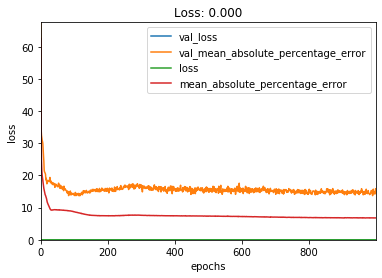

In [11]:
import matplotlib.pyplot as plt

historydf = pd.DataFrame(history.history, index=history.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [10]:
k = df_normalize.iloc[[10]]

k = np.array(k)
l = autoencoder.predict(k)

print(k)
print(l)

[[0.17396183 0.26122083 0.00592217 0.01799856 0.07838318 0.01286391
  0.63348512 0.09475866 0.29035522 0.09742587 0.25752688 0.64487742
  0.27454427]]
[[ 0.13382156  0.26021057 -0.01888399  0.00302905  0.06275058  0.06596929
   0.59158814  0.07714215  0.3161769   0.07974339  0.2618581   0.6406529
   0.27114305]]


In [ ]:
# Input values for koopman approximator

# x_train_forward_time
forward_time_steps = 6
x_train_ft = x_train.shift(-forward_time_steps, axis=0)
print(x_train_ft.shape)

# Prune last forward_time_steps rows
x_train_koopman = x_train.drop(x_train.tail(forward_time_steps).index)
x_train_ft_koopman = x_train_ft.drop(x_train_ft.tail(forward_time_steps).index)

# print(x_train_koopman.tail(10))
# print(x_train_ft_koopman.tail(10))





In [ ]:
# weight1=autoencoder.layers[0].get_weights()
# print(weight1)


In [ ]:


input_layer_k = Input(shape=(input_size,))
hidden_1_k = Dense(hidden_size_1, activation=activation, trainable=False)(input_layer_k)
hidden_12_k = Dense(hidden_size_2, activation=activation, trainable=False)(hidden_1_k)
code_k = Dense(code_size, trainable=False)(hidden_12_k)
code_2_k = Dense(code_size)(code_k)
hidden_22_k = Dense(hidden_size_2, activation=activation, trainable=False)(code_2_k)
hidden_2_k = Dense(hidden_size_1, activation=activation, trainable=False)(hidden_22_k)
output_layer_k = Dense(input_size, trainable=False)(hidden_2_k)

koopman = Model(input_layer_k, output_layer_k)

wt = autoencoder.layers[1].get_weights()
koopman.layers[1].set_weights(wt)
wt = autoencoder.layers[2].get_weights()
koopman.layers[2].set_weights(wt)
wt = autoencoder.layers[3].get_weights()
koopman.layers[3].set_weights(wt)
wt = autoencoder.layers[4].get_weights()
koopman.layers[5].set_weights(wt)
wt = autoencoder.layers[5].get_weights()
koopman.layers[6].set_weights(wt)
wt = autoencoder.layers[6].get_weights()
koopman.layers[7].set_weights(wt)

print(koopman.summary())

koopman.compile(optimizer=Adam(epsilon=1e-08), loss='mse')
history_k = koopman.fit(x_train_koopman, x_train_ft_koopman, epochs=100, validation_split=0.2)


In [ ]:
historydf = pd.DataFrame(history_k.history, index=history_k.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history_k.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [ ]:
# k = x_train_koopman.iloc[[10]]

# k = np.array(k)
# l = koopman.predict(k)

# m = x_train_ft_koopman.iloc[[10]]

# print(m)
# print(l)